In [1]:
import numpy as np
import pandas as pd

In [2]:
import sys

In [3]:
from common import compute_rmse_fraction

In [5]:
import pickle

In [6]:
knn_p= pickle.load(open("predictions/knn_all_homes.pkl","r"))
tensor_custom_p = pickle.load(open("predictions/o_tf.pkl",'r'))['tf']
tensor_custom_static_weather_p = pickle.load(open("predictions/o_tf_energy_static.pkl",'r'))['tf_energy_static']
mf_p = pickle.load(open("predictions/o_mf.pkl",'r'))['mf']
tensor_all_p = pickle.load(open("predictions/o_tf_all_appliances.pkl",'r'))['tf_all_appliances']
tensor_all_static_p = pickle.load(open("predictions/o_tf_all_appliances_static_weather.pkl",'r'))['tf_all_appliances_static_weather']
mf_all_p = pickle.load(open("predictions/o_mf_all_appliances.pkl",'r'))['mf_all_appliances']


In [40]:
knn= {}
feature='energy_static'
for appliance in knn_p.keys()[:]:
    knn[appliance] = {}
    for feature in ['energy', 'energy_static']:
        print appliance, feature
        best_error = 1e6
        for n in range(1, 10):
            pred = pd.DataFrame(knn_p[appliance][feature][n]).T

            alpha, beta, error, e = compute_rmse_fraction(appliance,pred)
            if error < best_error:
                best_error = error
                knn[appliance][feature] = best_error

hvac energy
hvac energy_static
wm energy
wm energy_static
fridge energy
fridge energy_static
mw energy
mw energy_static
oven energy
oven energy_static
dw energy
dw energy_static


In [7]:
pd.DataFrame(knn)

,dw,fridge,hvac,mw,oven,wm
energy,1.025643,3.767861,23.412383,1.944156,1.140918,0.424438
energy_static,1.044269,3.303662,20.681325,1.876657,1.154699,0.478881


In [41]:
dataset = 'False'
tf_custom= {}
for cost in ['abs','rel']:
    tf_custom[cost]= {}

    for appliance in tensor_custom_p.keys()[:]:
        tf_custom[cost][appliance]= {}
        for case in [str(x) for x in range(1, 5)]:
            print cost, appliance, case
            best_error = 1e6
            for a in [str(x) for x in range(1, 10)]:
                alpha, beta, error, e = compute_rmse_fraction(appliance,tensor_custom_p[appliance][case][a][cost][dataset])
                if error < best_error:
                    best_error = error
                    tf_custom[cost][appliance][case] = best_error

abs hvac 1
abs hvac 2
abs hvac 3
abs hvac 4
abs wm 1
abs wm 2
abs wm 3
abs wm 4
abs fridge 1
abs fridge 2
abs fridge 3
abs fridge 4
abs mw 1
abs mw 2
abs mw 3
abs mw 4
abs oven 1
abs oven 2
abs oven 3
abs oven 4
abs dw 1
abs dw 2
abs dw 3
abs dw 4
rel hvac 1
rel hvac 2
rel hvac 3
rel hvac 4
rel wm 1
rel wm 2
rel wm 3
rel wm 4
rel fridge 1
rel fridge 2
rel fridge 3
rel fridge 4
rel mw 1
rel mw 2
rel mw 3
rel mw 4
rel oven 1
rel oven 2
rel oven 3
rel oven 4
rel dw 1
rel dw 2
rel dw 3
rel dw 4


In [42]:
dataset = 'False'
tf_custom_all= {}
for cost in ['abs']:
    

    for appliance in tensor_custom_p.keys()[:]:
        tf_custom_all[appliance]= {}
        for case in [str(x) for x in range(1, 5)]:
            print cost, appliance, case
            best_error = 1e6
            for a in [str(x) for x in range(1, 11)]:
                try:
                    pred = tensor_all_p[appliance][case][a][cost]
                    if len(pred)<500:
                        print "Skipping", len(pred), a, appliance
                        continue
                    if appliance=='hvac':
                        pred = pred[range(4, 10)]
                    alpha, beta, error, e = compute_rmse_fraction(appliance,pred)
                    if error < best_error:
                        best_error = error
                        tf_custom_all[appliance][case] = best_error
                        print appliance, case, best_error
                except:
                    print a, appliance

abs hvac 1
hvac 1 17.7630641902
hvac 1 14.8485808153
Skipping 2 7 hvac
Skipping 2 8 hvac
Skipping 2 9 hvac
Skipping 2 10 hvac
abs hvac 2
hvac 2 17.7630641838
hvac 2 16.2031137482
hvac 2 14.1539853367
hvac 2 13.8131689854
abs hvac 3
hvac 3 17.7630641917
abs hvac 4
hvac 4 17.763064204
hvac 4 15.6481658613
hvac 4 15.2381104207
hvac 4 14.6986874705
hvac 4 13.7331806451
abs wm 1
wm 1 0.469764911689
wm 1 0.429988047225
wm 1 0.424523438451
Skipping 2 7 wm
Skipping 2 8 wm
Skipping 2 9 wm
Skipping 2 10 wm
abs wm 2
wm 2 0.469764910854
wm 2 0.412623515852
wm 2 0.401448496333
abs wm 3
wm 3 0.46976491212
abs wm 4
wm 4 0.469764910177
wm 4 0.439145783227
wm 4 0.431080988302
abs fridge 1
fridge 1 6.32588772469
fridge 1 6.32542747524
fridge 1 6.10063522493
Skipping 2 7 fridge
Skipping 2 8 fridge
Skipping 2 9 fridge
Skipping 2 10 fridge
abs fridge 2
fridge 2 6.32588772207
fridge 2 5.21931701233
fridge 2 4.9208118518
fridge 2 4.56052921469
fridge 2 4.47031026054
abs fridge 3
fridge 3 6.32588772592
fridge

In [10]:
pd.DataFrame(tf_custom_all)

,dw,fridge,hvac,mw,oven,wm
1,1.077895,6.100635,14.848581,2.034632,1.269625,0.424523
2,0.998765,4.470310,13.813169,1.896880,1.231017,0.401448
3,1.168700,5.665838,17.763064,1.967470,1.410991,0.469765
4,1.068626,5.311574,13.733181,1.948117,1.242377,0.431081


In [11]:
pd.DataFrame(tf_custom['abs'])

,dw,fridge,hvac,mw,oven,wm
1,0.983833,3.549308,25.885237,1.858268,1.180908,0.396592
2,1.143432,3.957940,25.791674,2.050480,1.410305,0.430687
3,1.151561,3.919696,25.208624,1.927213,1.204024,0.422099
4,0.998215,3.511995,23.428323,1.849683,1.223426,0.426134


In [12]:
tensor_custom_static_weather_p['hvac']['True']['1']['static']['weather'].keys()

['abs', 'rel']

In [43]:
dataset = 'False'
tf_custom_static_weather= {}
for cost in ['abs']:
    tf_custom_static_weather[cost]= {}

    for appliance in tensor_custom_static_weather_p.keys()[:]:
        tf_custom_static_weather[cost][appliance]= {}
        for static in ['None','static']:
            tf_custom_static_weather[cost][appliance][static] = {}
            for weather in ['None','weather']:
                tf_custom_static_weather[cost][appliance][static][weather] = {}
                print cost, appliance, static, weather
                best_error = 1e6
                for a in [str(x) for x in range(1, 10)]:
                    alpha, beta, error, e = compute_rmse_fraction(appliance,tensor_custom_static_weather_p[appliance][dataset][a][static][weather][cost])
                    if error < best_error:
                        best_error = error
                        tf_custom_static_weather[cost][appliance][static][weather] = best_error

abs hvac None None
abs hvac None weather
abs hvac static None
abs hvac static weather
abs wm None None
abs wm None weather
abs wm static None
abs wm static weather
abs fridge None None
abs fridge None weather
abs fridge static None
abs fridge static weather
abs mw None None
abs mw None weather
abs mw static None
abs mw static weather
abs oven None None
abs oven None weather
abs oven static None
abs oven static weather
abs dw None None
abs dw None weather
abs dw static None
abs dw static weather


In [44]:
dataset = 'False'
tf_all_static_weather= {}
for cost in ['abs']:
    tf_all_static_weather[cost]= {}

    for appliance in tensor_custom_static_weather_p.keys()[:]:
        tf_all_static_weather[appliance]= {}
        for static in ['None','static']:
            tf_all_static_weather[appliance][static] = {}
            for weather in ['None','weather']:
                tf_all_static_weather[appliance][static][weather] = {}
                print cost, appliance, static, weather
                
                best_error = 1e6
                for a in [str(x) for x in range(1, 13)]:
                    pred = tensor_all_static_p[appliance][static][weather][a]
                    if len(pred)<500:
                        print "Skipping", len(pred), a, appliance
                        continue
                    if appliance=='hvac':
                        pred = pred[range(4, 10)]
                    alpha, beta, error, e = compute_rmse_fraction(appliance,pred)
                    if error < best_error:
                        best_error = error
                        tf_all_static_weather[appliance][static][weather] = best_error

abs hvac None None
abs hvac None weather
abs hvac static None
abs hvac static weather
abs wm None None
abs wm None weather
abs wm static None
abs wm static weather
abs fridge None None
abs fridge None weather
abs fridge static None
abs fridge static weather
abs mw None None
abs mw None weather
abs mw static None
abs mw static weather
abs oven None None
abs oven None weather
abs oven static None
abs oven static weather
abs dw None None
abs dw None weather
abs dw static None
abs dw static weather


In [16]:
tensor_all_static_p['hvac']['None']['None']['1'].head()

,0,1,2,3,4,5,6,7,8,9,10,11
22,62.471570,55.410342,53.118615,60.043945,76.834781,103.934606,118.272531,132.008925,101.780324,80.768915,55.400818,61.628695
26,197.588447,175.254465,167.991461,189.888601,242.967287,328.637097,373.999833,417.375267,321.821203,255.392345,175.211227,194.909967
48,58.691529,52.056579,49.903085,56.408515,72.182939,97.642629,111.112891,124.018012,95.618192,75.878427,52.046702,57.897370
59,234.633043,208.144217,199.590839,225.661600,288.770737,390.580932,444.462509,496.045923,382.478425,303.541255,208.150986,231.550721
68,52.930423,46.947417,45.004707,50.872374,65.098702,88.060167,100.208452,111.847141,86.234462,68.431538,46.938469,52.214925


In [17]:
tensor_all_p['hvac']['2']['1']['abs'].head()

,0,1,2,3,4,5,6,7,8,9,10,11
22,62.471578,55.410331,53.118615,60.043944,76.834781,103.934606,118.272532,132.008926,101.780324,80.768915,55.400818,61.628695
26,197.588445,175.254473,167.991462,189.888595,242.967288,328.637098,373.999833,417.375267,321.821204,255.392346,175.211227,194.909985
48,58.691536,52.056579,49.903085,56.408515,72.182939,97.642629,111.112892,124.018012,95.618192,75.878427,52.046702,57.897374
59,234.633051,208.144215,199.590838,225.661595,288.770736,390.580931,444.462507,496.045922,382.478424,303.541254,208.150984,231.550685
68,52.930425,46.947419,45.004707,50.872372,65.098702,88.060167,100.208452,111.847141,86.234462,68.431538,46.938469,52.214917


In [18]:
pd.DataFrame(tf_all_static_weather['oven'])

,None,static
None,1.221285,1.203075
weather,1.206530,1.195222


In [19]:
out = {}
for static in ['None','static']:
    for weather in ['None','weather']:
        out[(static, weather)] =  {}
        for lat in range(1, 13):
            out[(static, weather)][lat] =  compute_rmse_fraction('hvac',tensor_all_static_p['hvac'][static][weather][str(lat)][range(4, 10)])[2]

In [20]:
%matplotlib inline

In [21]:
pd.DataFrame(out)

None                static           
         None    weather       None    weather
1   17.763064  37.782622  20.217724  39.385281
2   16.102053  18.280260  19.717019  19.689522
3   16.235800  16.402989  18.895503  18.666465
4   14.653888  14.765870  14.602751  14.620201
5   14.285999  15.071732  14.772588  14.628299
6   17.074482  14.242518  14.012570  13.417687
7   14.661236  15.393816  15.874992  14.579703
8   14.366443  14.109130  14.731058  14.450736
9   15.016477  15.166820  14.164564  13.782425
10  14.196895  13.779650  13.240585  13.542036
11  15.336962  15.395291  15.437599  15.166536
12  13.807373  14.089233  13.548811  14.052392

In [22]:
pd.DataFrame(out)

None                static           
         None    weather       None    weather
1   17.763064  37.782622  20.217724  39.385281
2   16.102053  18.280260  19.717019  19.689522
3   16.235800  16.402989  18.895503  18.666465
4   14.653888  14.765870  14.602751  14.620201
5   14.285999  15.071732  14.772588  14.628299
6   17.074482  14.242518  14.012570  13.417687
7   14.661236  15.393816  15.874992  14.579703
8   14.366443  14.109130  14.731058  14.450736
9   15.016477  15.166820  14.164564  13.782425
10  14.196895  13.779650  13.240585  13.542036
11  15.336962  15.395291  15.437599  15.166536
12  13.807373  14.089233  13.548811  14.052392

In [23]:
o = {}
l = {}
for a in [str(x) for x in range(1, 10)]:
    pred = tensor_all_p['hvac']['2'][a]['abs'][range(4, 10)]
    l[a] = pred.notnull().sum().sum()
    o[a] = compute_rmse_fraction('hvac',pred)[2]

In [24]:
pd.Series(o)

1    17.763064
2    16.203114
3    14.153985
4    15.141842
5    13.813169
6    14.950377
7    14.447301
8    14.623346
9    14.476985
dtype: float64

In [25]:
pd.Series(l)

1    3234
2    3234
3    3234
4    3234
5    3234
6    3234
7    3234
8    3234
9    3234
dtype: int64

In [45]:
case_2 = {}

for static in ['None','static']:
    for weather in ['None','weather']:
        case_2[(static, weather)] =  {}
        for appliance in mf_p.keys():
            max_error = 1e6
            for lat in range(1, 13):
                if appliance=='hvac':
                    pred = tensor_all_static_p[appliance][static][weather][str(lat)][range(4, 10)]
                else:
                    pred = tensor_all_static_p[appliance][static][weather][str(lat)]
                error = compute_rmse_fraction(appliance,pred)[2]
                if error<max_error:
                    max_error=error
                    case_2[(static, weather)][appliance]=max_error
                    print appliance, static, weather, max_error
                    

hvac None None 17.7630642206
hvac None None 16.1020530897
hvac None None 14.6538878121
hvac None None 14.2859985748
hvac None None 14.1968950532
hvac None None 13.8073730204
wm None None 0.469764909394
wm None None 0.413587272429
wm None None 0.410751348855
fridge None None 6.32588772569
fridge None None 5.21762112772
fridge None None 4.68905182067
mw None None 2.10204030088
mw None None 1.98867292297
mw None None 1.96597014228
mw None None 1.93457525086
mw None None 1.87018119667
mw None None 1.86913358136
oven None None 1.41099072725
oven None None 1.23778180249
oven None None 1.22128540494
dw None None 1.23663779963
dw None None 1.03815997465
dw None None 1.03036190824
dw None None 1.02855606586
dw None None 1.00162466642
dw None None 0.990500794595
hvac None weather 37.782621861
hvac None weather 18.2802598812
hvac None weather 16.4029889765
hvac None weather 14.7658700034
hvac None weather 14.2425178488
hvac None weather 14.1091297082
hvac None weather 13.7796496256
wm None weathe

In [69]:
pd.DataFrame(case_2)[('None','None')]

dw         0.991
fridge     4.689
hvac      13.807
mw         1.869
oven       1.221
wm         0.411
Name: (None, None), dtype: float64

In [65]:
pd.DataFrame(case_2)

None          static        
      None weather    None weather
1   17.763  37.783  20.218  39.385
2   16.102  18.280  19.717  19.690
3   16.236  16.403  18.896  18.666
4   14.654  14.766  14.603  14.620
5   14.286  15.072  14.773  14.628
6   17.074  14.243  14.013  13.418
7   14.661  15.394  15.875  14.580
8   14.366  14.109  14.731  14.451
9   15.016  15.167  14.165  13.782
10  14.197  13.780  13.241  13.542
11  15.337  15.395  15.438  15.167
12  13.807  14.089  13.549  14.052

In [28]:
pd.Series(o)

1    17.763064
2    16.203114
3    14.153985
4    15.141842
5    13.813169
6    14.950377
7    14.447301
8    14.623346
9    14.476985
dtype: float64

In [29]:
tensor_all_static_p['hvac'][static][weather][str(lat)][range(4, 10)].notnull().sum().sum()

3234

In [30]:
tensor_all_p['hvac']['2'][a]['abs'][range(4, 10)].notnull().sum().sum()

3234

/Users/nipunbatra/anaconda/lib/python2.7/site-packages/pandas/tools/plotting.py:983: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


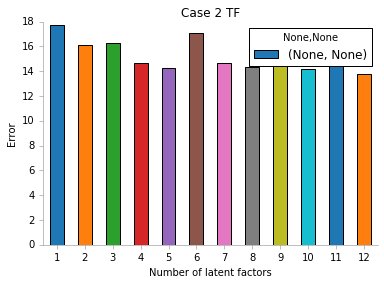

In [34]:
from plot_functions import *
pd.DataFrame(out).plot(kind="bar", rot=0,colors=tableau20blind[::2])
plt.title("Case 2 TF")
format_axes(plt.gca())
plt.ylabel("Error")
plt.xlabel("Number of latent factors")

#### MF

In [22]:
mf_all_p['hvac']['energy_static']['absolute']['False']['10'].head()

,hvac_1,hvac_2,hvac_3,hvac_4,hvac_5,hvac_6,hvac_7,hvac_8,hvac_9,hvac_10,hvac_11,hvac_12
22,0.002024,0.001606,0.001099,0.001675,32.665866,70.504339,133.029163,146.818462,88.255975,41.278395,0.001208,0.001481
26,0.001137,0.000863,0.000610,0.004192,113.148898,276.429461,391.070183,524.864451,431.895034,283.105591,0.002258,0.002322
48,0.001147,0.000924,0.000672,0.001525,34.571503,70.242366,115.920807,135.754067,102.345171,60.560169,0.001151,0.001207
59,0.011769,0.009605,0.006757,0.010997,199.984064,448.676296,603.396356,588.777179,324.290628,195.861721,0.004520,0.006698
68,0.000378,0.000360,0.000399,0.000942,23.623804,37.268843,74.811586,119.364258,114.231340,73.142826,0.001808,0.001755


In [33]:
mf_all_results = {}
dataset = 'False'
cost = 'absolute'
for appliance in mf_p:
    mf_all_results[appliance] = {}
    for feature in ['energy_static','energy']:
        mf_all_results[appliance][feature] = {}
        
        least_error = 1000
        for lat in [str(x) for x in range(1, 10)]:
            try:
                print lat, cost, feature, appliance
                pred = mf_all_p[appliance][feature][cost][dataset][lat]
                if appliance=="hvac":
                    pred = pred[['hvac_%d' %month for month in range(5, 11)]]
                gt_f, pred_f, rms,e  = compute_rmse_fraction(appliance, pred)
                if rms < least_error:
                    least_error = rms
                    best_k = lat
                    print best_k, least_error
            except:
                pass
        mf_all_results[appliance][feature] = least_error

1 absolute energy_static hvac
2 absolute energy_static hvac
3 absolute energy_static hvac
3 18.143769062
4 absolute energy_static hvac
4 15.7209247211
5 absolute energy_static hvac
5 13.8654417136
6 absolute energy_static hvac
7 absolute energy_static hvac
8 absolute energy_static hvac
9 absolute energy_static hvac
1 absolute energy hvac
1 15.6784841771
2 absolute energy hvac
3 absolute energy hvac
4 absolute energy hvac
5 absolute energy hvac
6 absolute energy hvac
7 absolute energy hvac
8 absolute energy hvac
9 absolute energy hvac
1 absolute energy_static wm
2 absolute energy_static wm
3 absolute energy_static wm
3 10.721842875
4 absolute energy_static wm
5 absolute energy_static wm
6 absolute energy_static wm
7 absolute energy_static wm
7 10.083213108
8 absolute energy_static wm
8 9.10116766984
9 absolute energy_static wm
1 absolute energy wm
1 11.2634963439
2 absolute energy wm
3 absolute energy wm
3 10.1402104736
4 absolute energy wm
5 absolute energy wm
5 9.6001229764
6 absolute

In [34]:
mf_all_results

{'dw': {'energy': 1.0434789259577475, 'energy_static': 0.89631582070425253},
 'fridge': {'energy': 5.535267414082905, 'energy_static': 4.3141679140182747},
 'hvac': {'energy': 15.678484177132265, 'energy_static': 13.865441713582632},
 'mw': {'energy': 1.9548876452610784, 'energy_static': 1.9108992830882339},
 'oven': {'energy': 1.3261521795112363, 'energy_static': 1.3103144413275618},
 'wm': {'energy': 9.6001229764020017, 'energy_static': 9.1011676698397714}}

In [35]:
mf_results = {}
dataset = 'False'
for appliance in mf_p:
    mf_results[appliance] = {}
    for feature in ['energy_static','energy']:
        mf_results[appliance][feature] = {}
        for cost in ['absolute']:
            mf_results[appliance][feature][cost] = {}
            least_error = 1000
            for lat in [str(x) for x in range(1, 10)]:
                try:
                    pred = mf_p[appliance][feature][cost][dataset][lat]
                    if appliance=="hvac":
                        pred = pred[['hvac_%d' %month for month in range(5, 11)]]
                    gt_f, pred_f, rms,e  = compute_rmse_fraction(appliance, pred)
                    if rms < least_error:
                        least_error = rms
                        best_k = lat
                        print best_k, least_error
                except Exception, e:
                    print e
            mf_results[appliance][feature][cost] = least_error

'1'
'2'
3 17.2428962453
4 14.3021075028
8 13.0166182945
1 12.7640933676
9 11.712453226
'1'
'2'
3 0.433884866727
4 0.415647932101
1 0.412417939015
'1'
'2'
3 4.26741853414
7 4.14079724254
1 5.78214171834
2 5.64066870942
3 5.10089240688
7 4.96539365693
9 4.83968530451
'1'
'2'
3 1.95645409456
4 1.95159337052
5 1.94218211892
8 1.93063051101
1 1.99784140386
3 1.96687948403
5 1.9544010806
6 1.95351965483
9 1.93406178954
'1'
'2'
3 1.22885828811
5 1.22134676942
9 1.21168373666
1 1.21744399741
7 1.15299884912
9 1.11639718972
'1'
'2'
3 0.92571862578
4 0.816299655893
1 1.04807691769


In [36]:
mf_results

{'dw': {'energy': {'absolute': 1.0480769176935127},
  'energy_static': {'absolute': 0.8162996558932466}},
 'fridge': {'energy': {'absolute': 4.8396853045107751},
  'energy_static': {'absolute': 4.1407972425425079}},
 'hvac': {'energy': {'absolute': 11.712453226027888},
  'energy_static': {'absolute': 13.016618294462925}},
 'mw': {'energy': {'absolute': 1.9340617895385916},
  'energy_static': {'absolute': 1.9306305110066977}},
 'oven': {'energy': {'absolute': 1.1163971897162603},
  'energy_static': {'absolute': 1.2116837366634992}},
 'wm': {'energy': {'absolute': 0.41241793901468321},
  'energy_static': {'absolute': 0.41564793210146189}}}

In [37]:
mf_relative = {}
mf_abs = {}
for appliance in mf_results.keys():
    for cost in ['absolute']:
        if cost=="absolute":
            mf_abs[appliance] =  pd.DataFrame(mf_results[appliance]).ix[cost]
        else:
            mf_relative[appliance] =  pd.DataFrame(mf_results[appliance]).ix[cost]


In [38]:
pd.DataFrame(mf_relative)

""


In [39]:
pd.DataFrame(mf_abs)

,dw,fridge,hvac,mw,oven,wm
energy,1.048077,4.839685,11.712453,1.934062,1.116397,0.412418
energy_static,0.816300,4.140797,13.016618,1.930631,1.211684,0.415648


In [41]:
(pd.DataFrame(tf_custom_static_weather['abs']).ix['static']).ix['dw']['weather']

0.92612088052485497

In [42]:
pd.DataFrame(tf_custom['abs']).index

Index([u'1', u'2', u'3', u'4'], dtype='object')

In [43]:
 pd.DataFrame(tf_custom['abs']).ix['1']

dw         0.983833
fridge     3.549308
hvac      25.885237
mw         1.858268
oven       1.180908
wm         0.396592
Name: 1, dtype: float64

In [54]:
results_df ={}
results_df[('MF-1-at-a-time','Energy')] = pd.DataFrame(mf_abs).ix['energy']
results_df[('MF-1-at-a-time','Energy+Static')] = pd.DataFrame(mf_abs).ix['energy_static']

results_df[('MF-all-appliances','Energy')] = pd.DataFrame(mf_all_results).ix['energy']
results_df[('MF-all-appliances','Energy+Static')] = pd.DataFrame(mf_all_results).ix['energy_static']

#results_df[('MF (Rel)','Energy')] = pd.DataFrame(mf_relative).ix['energy']
#results_df[('MF (Rel)','Energy+Static')] = pd.DataFrame(mf_relative).ix['energy_static']

#results_df[('Tensor (Parafac)','Energy')] = pd.Series(tensor_parafac_results)


results_df[('KNN','Energy')] = pd.DataFrame(knn).ix['energy']
results_df[('KNN','Energy+Static')] = pd.DataFrame(knn).ix['energy_static']
#results_df[('KNN','Oracle')] = pd.Series(knn_oracle)

#results_df[('KNN (ML)','Energy')] = pd.DataFrame(ml_results).ix['energy']
#results_df[('KNN (ML)','Energy+Static')] = pd.DataFrame(ml_results).ix['energy_static']

for case in [1, 2, 3, 4]:
    results_df[('TF-1-at-a-time-'+str(case),'Energy')] = pd.DataFrame(tf_custom['abs']).ix[str(case)]
    results_df[('TF-all-appliances-'+str(case),'Energy')] = pd.DataFrame(tf_custom_all).ix[str(case)]
del results_df[('TF-all-appliances-'+str(2),'Energy')]
results_df[('TF-all-appliances-'+str(2),'Energy')] = pd.DataFrame(case_2)[('None','None')]
results_df[('TF-all-appliances-'+str(2),'Energy+Static')] = pd.DataFrame(case_2)[('static','None')]
results_df[('TF-all-appliances-'+str(2),'Energy+Weather')] = pd.DataFrame(case_2)[('None','weather')]
results_df[('TF-all-appliances-'+str(2),'Energy+Static+Weather')] = pd.DataFrame(case_2)[('static','weather')]



#for case in range(1, 5):
#    results_df[('TF-Custom-'+str(case)+" (Rel)",'Energy')] = pd.DataFrame(tf_custom_rel).ix[case]

#results_df[('TF-Custom-'+str(4)+" (Abs)",'Energy+Static')] = pd.Series(tf_custom_parafac_static)
#results_df[('TF-Custom-'+str(4)+" (Rel)",'Energy+Static')] = pd.Series(tf_custom_parafac_static_rel)

#results_df[('TF-Custom-'+str(2)+" (Rel)",'Energy+Static+Weather')] = pd.Series(tf_custom_static_weather)
#results_df[('TF-Custom-'+str(2)+" (Abs)",'Energy+Static+Weather')] = pd.Series(tf_custom_static_weather)
#results_df[('TF-Custom-'+str(2)+" (Abs)",'Energy+Static')] = pd.Series(tf_custom_static_abs)
#results_df[('TF-Custom-'+str(2)+" (Rel)",'Energy+Static')] = pd.Series(tf_custom_2_static_rel)


#results_df[('TF-Custom-'+str(2)+" (Abs)",'Energy+Static')] = pd.Series({appliance:tf_custom_static_weather['abs'][appliance]['static']['None'] for appliance in mf_p})
#results_df[('TF-Custom-'+str(2)+" (Abs)",'Energy+Weather')] = pd.Series({appliance:tf_custom_static_weather['abs'][appliance]['None']['weather'] for appliance in mf_p})
#results_df[('TF-Custom-'+str(2)+" (Abs)",'Energy+Static+Weather')] = pd.Series({appliance:tf_custom_static_weather['abs'][appliance]['static']['weather'] for appliance in mf_p})







In [55]:
pd.DataFrame(results_df)

KNN               MF-1-at-a-time               MF-all-appliances  \
        Energy Energy+Static         Energy Energy+Static            Energy   
dw       1.026         1.044          1.048         0.816             1.043   
fridge   3.768         3.304          4.840         4.141             5.535   
hvac    23.412        20.681         11.712        13.017            15.678   
mw       1.944         1.877          1.934         1.931             1.955   
oven     1.141         1.155          1.116         1.212             1.326   
wm       0.424         0.479          0.412         0.416             9.600   

                     TF-1-at-a-time-1 TF-1-at-a-time-2 TF-1-at-a-time-3  \
       Energy+Static           Energy           Energy           Energy   
dw             0.896            0.984            1.143            1.152   
fridge         4.314            3.549            3.958            3.920   
hvac          13.865           25.885           25.792           25.209   
mw             1.911            1.858            2.050            1.927   
oven           1.310            1.181            1.410            1.204   
wm             9.101            0.397            0.431            0.422   

       TF-1-at-a-time-4 TF-all-appliances-1 TF-all-appliances-2                \
                 Energy              Energy              Energy Energy+Static   
dw                0.998               1.078               0.991         0.916   
fridge            3.512               6.101               4.689         4.284   
hvac             23.428              14.849              13.807        13.241   
mw                1.850               2.035               1.869         1.847   
oven              1.223               1.270               1.221         1.203   
wm                0.426               0.425               0.411         0.404   

                                            TF-all-appliances-3  \
       Energy+Static+Weather Energy+Weather              Energy   
dw                     0.913          1.008               1.169   
fridge                 4.322          4.730               5.666   
hvac                  13.418         13.780              17.763   
mw                     1.850          1.864               1.967   
oven                   1.195          1.207               1.411   
wm                     0.400          0.408               0.470   

       TF-all-appliances-4  
                    Energy  
dw                   1.069  
fridge               5.312  
hvac                13.733  
mw                   1.948  
oven                 1.242  
wm                   0.431

In [56]:
def highlight_min(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_min = s == s.min()
    return ['background-color: gray' if v else '' for v in is_min]

In [57]:
pd.set_option('precision', 3)
out = pd.DataFrame(results_df).T
out.columns = [str.capitalize(x) for x in out.columns]
import seaborn as sns

cm = sns.light_palette("orange", as_cmap=True)

s = out.style.background_gradient(cmap=cm)
s
#out.style.apply(highlight_min)
#out.style.set_properties(**{'text-align': 'right'})


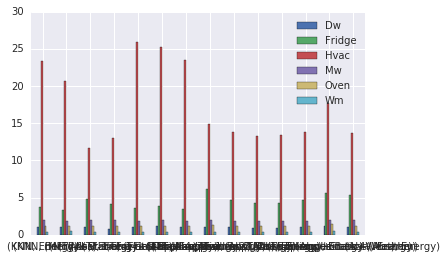

In [76]:
%matplotlib inline
out.plot(kind="bar",rot=0)

In [50]:
appliance='hvac'
pred = knn_p[appliance][feature][neighbours]
gt_f, pred_f, rms, e = compute_rmse_fraction(appliance, pred)

NameError: name 'neighbours' is not defined

In [ ]:
print neighbours
pred = mf_p[appliance][feature]['relative'][neighbours]
gt_f, pred_f, rms, e = compute_rmse_fraction(appliance, pred)

In [ ]:
e[e>50]

In [ ]:
pred.ix[7641]

In [ ]:
gt_f.ix[7641]

In [ ]:
pred_f[pred_f>60].unstack().dropna()

In [ ]:
from mf_core import *

import numpy as np
import pandas as pd
import sys
from create_matrix import *
from sklearn.model_selection import LeaveOneOut
from scipy.optimize import nnls

import pickle
from tensor_custom_core import *


APPLIANCES = ['fridge', 'hvac', 'wm', 'mw', 'oven', 'dw']
region = "Austin"
year = 2014

def un_normalize(x, maximum, minimum):
    return (maximum-minimum)*x + minimum


a, b = 3, 3

print a, b


pred = {}
for appliance in APPLIANCES[:1]:
    pred[appliance] = {}
    if appliance == "hvac":
        start, stop = 5, 11
    else:
        start, stop = 1, 13
    months = stop - start
    pred[appliance] = {}
    appliance_df = create_matrix_all_entries(region, year, appliance)
    aggregate_cols = [x for x in appliance_df.columns if "aggregate" in x]
    appliance_cols = [x for x in appliance_df.columns if appliance in x]
    energy_cols = np.concatenate([aggregate_cols, appliance_cols])

    df = appliance_df.copy()

In [ ]:
df.columns[-3:]

In [ ]:
static_cols = ['area', 'total_occupants', 'num_rooms']
static_df = df[static_cols]
static_df = static_df.div(static_df.max())

In [ ]:
static_df

In [ ]:
weather_df = np.ones(len(static_df)).reshape(-1, 1)

In [ ]:
weather_df